# Линейная регрессия

## Общая формулировка задачи

- $x_1..x_n \in X$ 
- $y_1..y_n \in Y$ 
- $w_0..w_n$ —  вектор парметров 
- $\phi_i: X \to \mathbb{R}$ —  линейная функция
- $a(x,w) = argmax_y \sum_{i=0}^{n} w_{yi} \phi_i(x)$ —  линейный алгоритм классификации 
- $L(\langle {w, x_i} \rangle, y_i)$                  —  функция потерь 

$\phi = argmin_\phi \sum_{i=1}^{n} L(\langle {w, x_i} \rangle, y_i)$ -- хотим найти минимум эмперического риска 

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
def get_data_from_file(filename):
    """
    data = [M -- features num, 
            N -- num of train data, 
            train features -- dataframe, 
            train target -- array
            K -- num of test data, 
            test data -- dataframe,
            test target -- array]
    """
    data = []
    with open(filename, 'r') as file:
        lines = [line[:-1] for line in file]
        
        data.append(int(lines[0])) # M
        data.append(int(lines[1])) # N
        M = data[0]
        N = data[1]
        
        train = []
        train_target = []
        for i in range(N):
            temp = []
            line = lines[i+2].split()
            for j in range(M):
                temp.append(float(line[j]))
            train_target.append(float(line[M]))
            train.append(temp)
            
        train_df = pd.DataFrame(train)
        data.append(train_df)
        data.append(train_target)
        
        data.append(int(lines[N+2]))
        K = data[4]
        
        test = []
        test_target = []
        for i in range(K):
            temp = []
            line = lines[N+2+1+i].split()
            for j in range(M):
                temp.append(float(line[j]))
            test_target.append(float(line[M]))
            test.append(temp)
            
        test_df = pd.DataFrame(test)
        data.append(test_df)
        data.append(test_target)
        
    return data   

In [3]:
data = get_data_from_file('LR/1.txt')

In [4]:
data[2][:5]

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
0,861813.0,-109689.0,-501867.0,299787.0,2720.0,-596749.0,95961.0,-43490.0,451227.0,994130.0,...,-408709.0,-947883.0,1065965.0,213248.0,1469971.0,-213545.0,2727628.0,6259280.0,-1042685.0,-138552.0
1,734897.0,-109701.0,-501867.0,299787.0,2720.0,-596756.0,95864.0,46535.0,451227.0,994130.0,...,-407735.0,-111284.0,1065965.0,226791.0,1471724.0,-210350.0,2693318.0,6219628.0,-1042685.0,-138631.0
2,893009.0,-109653.0,-501867.0,299787.0,2720.0,-596728.0,96258.0,-65515.0,451227.0,994130.0,...,-397220.0,-913285.0,1065965.0,195846.0,1490651.0,-175851.0,2704943.0,6223772.0,-1042685.0,-139484.0
3,898311.0,-109683.0,-501867.0,299787.0,2720.0,-596745.0,96013.0,-69651.0,451227.0,994130.0,...,-387194.0,-1185096.0,1065965.0,183087.0,1508697.0,-142958.0,2759332.0,6305891.0,-1042685.0,-140297.0
4,423466.0,-109710.0,-501867.0,299787.0,2720.0,-596761.0,95793.0,267483.0,451227.0,994130.0,...,-396583.0,-1579790.0,1065965.0,249500.0,1491797.0,-173762.0,2592164.0,6097935.0,-1042685.0,-139536.0


In [5]:
data[5][:5]

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
0,-213410.0,-109667.0,-501867.0,299787.0,2720.0,-596736.0,96145.0,719579.0,451227.0,994130.0,...,-357520.0,-644531.0,1065965.0,276460.0,1562109.0,-45602.0,2322553.0,5756964.0,-1042685.0,-142704.0
1,-533970.0,-109671.0,-501867.0,299787.0,2720.0,-596738.0,96115.0,946796.0,451227.0,994130.0,...,-327541.0,977058.0,1065965.0,277545.0,1616070.0,52753.0,2233148.0,5655865.0,-1042685.0,-145136.0
2,-733427.0,-109690.0,-501867.0,299787.0,2720.0,-596750.0,95954.0,1087906.0,451227.0,994130.0,...,-299144.0,1039057.0,1065965.0,266441.0,1667183.0,145919.0,2212326.0,5646204.0,-1042685.0,-147439.0
3,-250862.0,-109705.0,-501867.0,299787.0,2720.0,-596758.0,95836.0,745704.0,451227.0,994130.0,...,-344487.0,-201972.0,1065965.0,265026.0,1585569.0,-2841.0,2373625.0,5838374.0,-1042685.0,-143761.0
4,-442390.0,-109682.0,-501867.0,299787.0,2720.0,-596745.0,96023.0,881138.0,451227.0,994130.0,...,-288131.0,1063974.0,1065965.0,219380.0,1687008.0,182054.0,2331963.0,5799991.0,-1042685.0,-148332.0


### Нормализация

In [6]:
def min_max_normalization(column):
    max_value = column.max()
    min_value = column.min()
    return column.apply(lambda x: 0) if (max_value == min_value) else column.apply(lambda x: (x - min_value) / (max_value - min_value))

In [7]:
def normalize(data):
    """
    features in data are under indices 2 and 5
    """
    for column in data[2].columns:
        data[2][column] = min_max_normalization(data[2][column])
    for column in data[5].columns:
        data[5][column] = min_max_normalization(data[5][column])
    return data

In [8]:
data = normalize(data)

In [9]:
data[2][:5]

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
0,0.984952,0.380368,0,0,0,0.378947,0.380282,0.015206,0,0,...,0.000000,0.149069,0,0.398622,0.000000,0.000000,0.960838,0.952097,0,1.000000
1,0.932624,0.306748,0,0,0,0.305263,0.308377,0.067533,0,0,...,0.004764,0.346425,0,0.478101,0.004763,0.004763,0.918457,0.911345,0,0.995236
2,0.997814,0.601227,0,0,0,0.600000,0.600445,0.002404,0,0,...,0.056189,0.157230,0,0.296496,0.056190,0.056190,0.932817,0.915604,0,0.943801
3,1.000000,0.417178,0,0,0,0.421053,0.418829,0.000000,0,0,...,0.105223,0.093109,0,0.221618,0.105223,0.105222,1.000000,1.000000,0,0.894778
4,0.804221,0.251534,0,0,0,0.252632,0.255745,0.195958,0,0,...,0.059304,0.000000,0,0.611372,0.059303,0.059304,0.793508,0.786278,0,0.940666


In [10]:
data[5][:5]

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
0,0.570949,0.451389,0,0,0,0.452381,0.451858,0.429594,0,0,...,0.366416,0.142222,0,0.746180,0.366415,0.366416,0.444387,0.412997,0,0.633617
1,0.409198,0.423611,0,0,0,0.428571,0.426520,0.591173,0,0,...,0.532219,0.586999,0,0.752598,0.532218,0.532217,0.323187,0.301837,0,0.467780
2,0.308554,0.291667,0,0,0,0.285714,0.290541,0.691519,0,0,...,0.689272,0.604004,0,0.686916,0.689270,0.689270,0.294960,0.291214,0,0.310740
3,0.552052,0.187500,0,0,0,0.190476,0.190878,0.448172,0,0,...,0.438497,0.263609,0,0.678546,0.438500,0.438500,0.513622,0.502509,0,0.561541
4,0.455408,0.347222,0,0,0,0.345238,0.348818,0.544482,0,0,...,0.750181,0.610838,0,0.408543,0.750185,0.750184,0.457144,0.460306,0,0.249847


## Решение

### Оценка качества алгоритма с помощью NRMSE

$RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_{real} - y_{predicted})^2}{n}}$ 

$NRMSE = \frac{RMSE}{y_{prmax} - y_{prmin}}$

In [11]:
from math import sqrt

In [91]:
def nrmse(y_real, y_predicted):
    n = len(y_real)
    rmse = sqrt(sum(list(map(lambda x, y: (x - y)**2, y_real, y_predicted))) / n)
    prmax = max(y_predicted)
    prmin = min(y_predicted)
    nrmse = rmse / (prmax - prmin)
    return nrmse

### [Метод наименьших квадратов](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2)

$y_i = f(w, x_i) + \varepsilon_i, \varepsilon_i$ — аддитивная случайная величина \
$m$ — число признаков \
$y_i = w_0x_{0}^i + w_1x_1^i + .. + w_{m-1}x_{m-1}^i + w_m$ \
По МНК: \
$w = (A^T A)^{-1} A^T y$, где
$y = (y_1..y_n)$,
$A = \begin{pmatrix}
  1 & x_0^0 & \cdots & x_{m-1}^0 \\
  1 & x_0^1 & \cdots & x_{m-1}^1 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  1 & x_0^n & \cdots & x_0^n 
 \end{pmatrix}$

In [13]:
from numpy.linalg import inv

In [14]:
def make_matrix_from_features(dff):
    matrix = dff.values
    n = dff.shape[0]
    matrix = np.insert(matrix, 0, 1, axis=1)
    return matrix

In [15]:
def mls(data):
    a_train = make_matrix_from_features(data[2])
    target_train = data[3]
    a_test = make_matrix_from_features(data[5])
    target_test = data[6]
    
    min_nrmse = 10000000000
    best_param = -1
    for i in np.linspace(0.1, 100, 300):
        w = inv(a_train.T @ a_train + i * np.identity(a_train.shape[1])) @ a_train.T @ target_train
        target_predicted = a_test @ w
        cur_nrmse = nrmse(target_test, target_predicted)
        if (cur_nrmse < min_nrmse):
            min_nrmse = cur_nrmse
            best_param = i
    return min_nrmse, best_param

In [16]:
min_nrmse, best_param = mls(data)

In [17]:
min_nrmse, best_param

(0.12267467649591733, 100.0)

### [Метод стохастического градиента](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%81%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%B0)

In [23]:
import random

In [24]:
num_iter = 2000

In [92]:
def sgd(data, l):
    m = data[0]
    n = data[1]
    w = [random.uniform(-1/2*m, 1/2*m) for i in range(m+1)]
    
    a_train = make_matrix_from_features(data[2])
    a_test = make_matrix_from_features(data[5])
    target_test = data[6]
    target_train = data[3]
    
    nrmse_train = []
    nrmse_test = []
    
    for i in range(num_iter):
        step = 1/(i+1)
        idx = random.randint(0, n-1)
        
        predicted = a_train[idx] @ w
        diff = predicted - target_train[idx]
        
        grad = np.zeros(m+1)
        for j in range(m + 1):
            grad[j] = a_train[idx][j] * diff + l * np.sign(w[j])
            w[j] -= step * grad[j]

        nrmse_train.append(nrmse(target_train, a_train @ w))
        nrmse_test.append(nrmse(target_test, a_test @ w))
        
    return nrmse(target_test, a_test @ w), nrmse_train, nrmse_test

In [93]:
min_nrmse = 10000000000

for l in np.linspace(1, 300, 1):
    cur_nrmse, nrmse_train, nrmse_test = sgd(data, l)
    print()
    if (cur_nrmse < min_nrmse):
        min_nrmse = cur_nrmse
        best_data = [nrmse_train, nrmse_test]

In [95]:
min_nrmse

0.17774628463320546

## Графики

In [99]:
import matplotlib.pyplot as plt

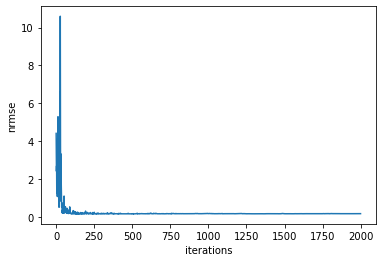

In [103]:
plt.plot(best_data[0])
plt.xlabel('iterations')
plt.ylabel('nrmse')
plt.show()

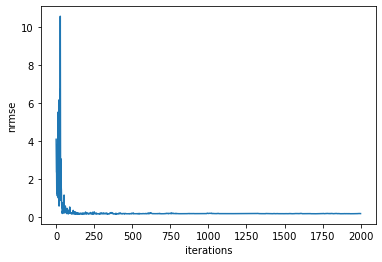

In [102]:
plt.plot(best_data[1])
plt.xlabel('iterations')
plt.ylabel('nrmse')
plt.show()